Github Link: https://github.com/dreeew05/CMSC-197/blob/main/Assignment%202/hw3-bulaong.ipynb

Importing packages and Loading the Advertising Data

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

Read and clean data

In [235]:
data = pd.read_csv('Advertising.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Standardize each column using sklearn

In [236]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Convert back to dataframe for better visualization
data_standardized_df = pd.DataFrame(data_standardized, columns=data.columns)
data_standardized_df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [237]:
x = data_standardized[:, :-1]
y = data_standardized[:, -1]

Adding bias

In [238]:
data_standardized_df.insert(0, 'Bias', 1)
data_standardized_df.head()

,Bias,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683


In [239]:
x = data_standardized_df.iloc[:, :-1].values
y = data_standardized_df.iloc[:, -1].values

Divide the dataset into training and testing (0.85 : 0.15)

In [240]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

Required Functions:

In [241]:
def initialize_weights(seed=None):
    if seed:
        return np.random.uniform(0, 1, size=(4,))
    else:
        return np.array([0.0, 0.0, 0.0, 0.0])

In [242]:
def predict(x, weights):
    return np.dot(x, weights)

In [243]:
def compute_cost(y_hat, y, m=len(y)):
    return 1 / (m * 2) * np.sum(np.square(y_hat - y))

In [244]:
def compute_gradient(x, y, theta, m=len(y)):
    y_hat = predict(x, theta)
    return 1 / m * np.dot((y_hat - y), x)

In [245]:
def update_weights(w, theta, a):
    return theta - a * w

In [246]:
def gradient_descent(x, y, theta, alpha, iterations):
    costs = []

    for _ in range(iterations):
        y_hat = predict(x, theta)
        cost = compute_cost(y_hat, y)
        costs.append(cost) 
        w = compute_gradient(x, y, theta)
        theta = update_weights(w, theta, alpha)

    return theta, costs

In [247]:
def plot_cost(costs, title_param):
    plt.plot(costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Cost vs Iterations {title_param}')
    plt.show()

Training the model

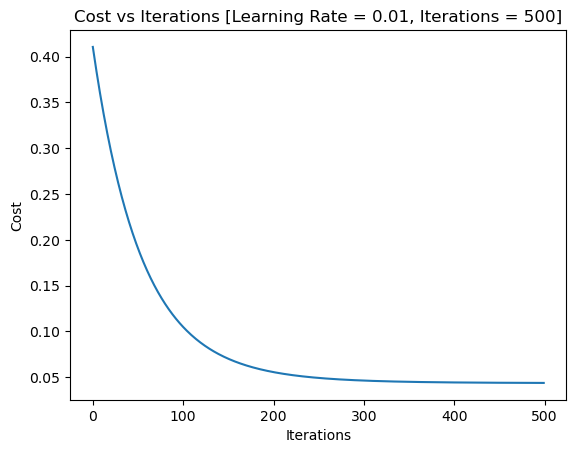

In [248]:
learning_rate = 0.01 #alpha
iterations = 500

weights, costs = gradient_descent(
    x_train, y_train, initialize_weights(), learning_rate, iterations
)

plot_cost(costs, '[Learning Rate = 0.01, Iterations = 500]')

Predict the quantitative response y on the train set and calculate the cost

In [249]:
y_hat_train = predict(x_train, weights)

# Compare Actual vs Predicted Train Values
train_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_hat_train})
train_cost = compute_cost(y_hat_train, y_train)
train_mse = mean_squared_error(y_train, y_hat_train)

print(f'Cost: {train_cost}')
print(f'MSE: {train_mse}')
train_df.head()

Cost: 0.04386608389915135
MSE: 0.1032143150568267


,Actual,Predicted
0,-0.657617,-0.282797
1,-0.523115,-0.769531
2,1.859486,1.388781
3,-1.022693,-0.325059
4,0.399182,0.817058


Predict the quantitative response y on the test set

In [250]:
y_hat_test = predict(x_test, weights)

# Compare Actual vs Predicted Test Values
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test})
test_cost = compute_cost(y_hat_test, y_test)
test_mse = mean_squared_error(y_test, y_hat_test)

print(f'Cost: {test_cost}')
print(f'MSE: {test_mse}')
test_df.head()

Cost: 0.00821683917806102
MSE: 0.10955785570748026


,Actual,Predicted
0,0.552898,0.455940
1,1.609697,1.291853
2,1.417551,1.431162
3,-1.291696,-0.655187
4,2.051631,1.494829


Revert back to the original form

In [251]:
x_mean = np.mean(data.to_numpy()[:, :-1], axis=0)
x_std = np.std(data.to_numpy()[:, :-1], axis=0)

x_original = x.copy()
# Do not include the bias in the calculation
x_original[:, 1:] = x_original[:, 1:] * x_std + x_mean

# Convert to df for better visualization
x_original_df = pd.DataFrame(x_original, columns=data_standardized_df.columns[:-1])
x_original_df.head()

,Bias,TV,Radio,Newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


${\huge \textbf{Questions}}$

1. What are optimal weights found by your implemented gradient descent? Plug it into the linear model:}

In [252]:
bias = weights[0]
theta_tv = weights[1]
theta_radio = weights[2]
theta_newspaper = weights[3]

print(f'h_theta(x) = {bias} + {theta_tv}TV + {theta_radio}Radio + {theta_newspaper}Newspaper')

h_theta(x) = 0.0019060625334216344 + 0.7276734116137625TV + 0.5180251980677989Radio + 0.02363435095095758Newspaper


What are your interpretations regarding the formed linear model?

- It can be observed from the model that TV is the most effective means of media in terms of sale followed by Radio, and Newspaper. 

2. Provide a scatter plot of the $\hat{(y^{(i)})}$ and $y^{(i)}$ for both the train and test set. Is there a trend? Provide an r2 score (also available in sklearn).

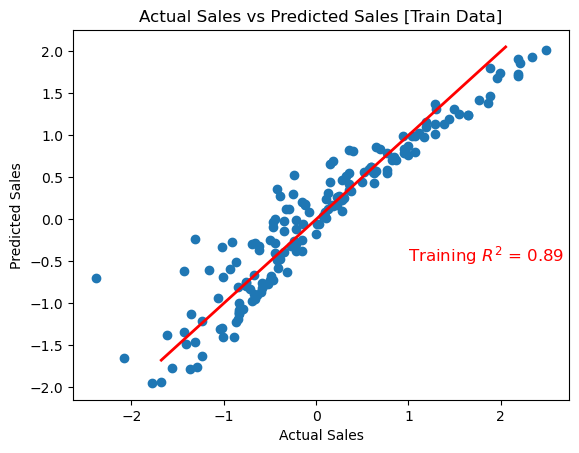

In [253]:
plt.scatter(y_train, y_hat_train, label='Training Data')
plt.title("Actual Sales vs Predicted Sales [Train Data]")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2)
train_r2 = r2_score(y_train, y_hat_train)
plt.text(1, -0.5, f"Training $R^2$ = {train_r2:.2f}", fontsize=12, color="red")
plt.show()

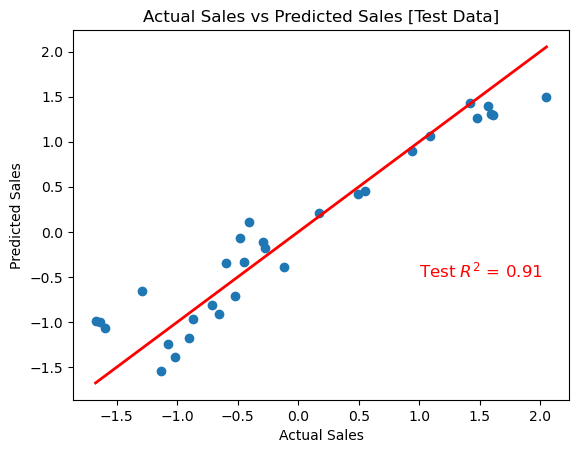

In [254]:
plt.scatter(y_test, y_hat_test, label="Test Data")
plt.title("Actual Sales vs Predicted Sales [Test Data]")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", lw=2)
test_r2 = r2_score(y_test, y_hat_test)
plt.text(1, -0.5, f"Test $R^2$ = {test_r2:.2f}", fontsize=12, color="red")
plt.show()

- It can be seen that both scatter plots shows an linear upward trend with strong R^2 values. Having a strong coefficient of determination means that there is a strong fit between predicted and actual values. 

3. What happens to the error, $R^2$, and cost as the number of iterations increase? Show your data and proof. You can alternatively plot your result data for visualization and check until 50000 iterations or more (actually).

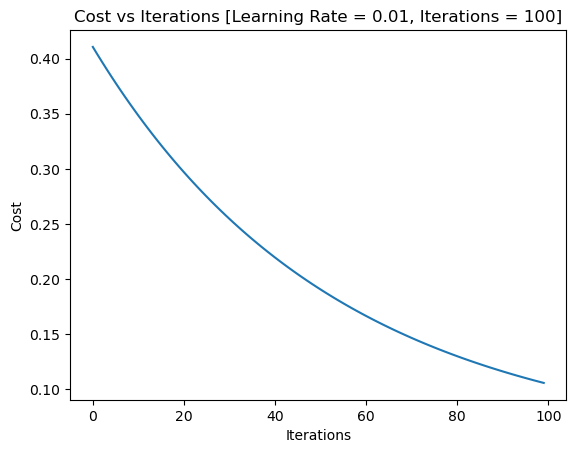

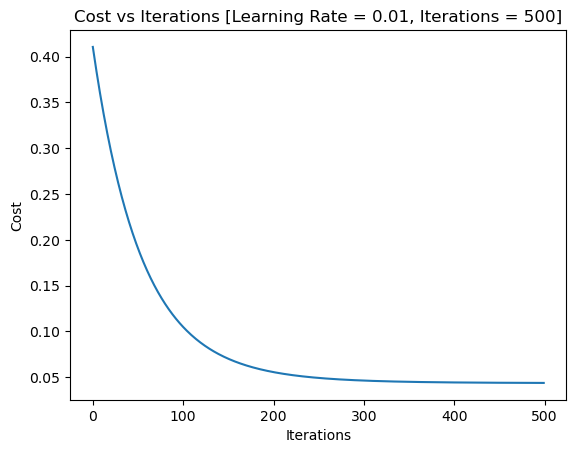

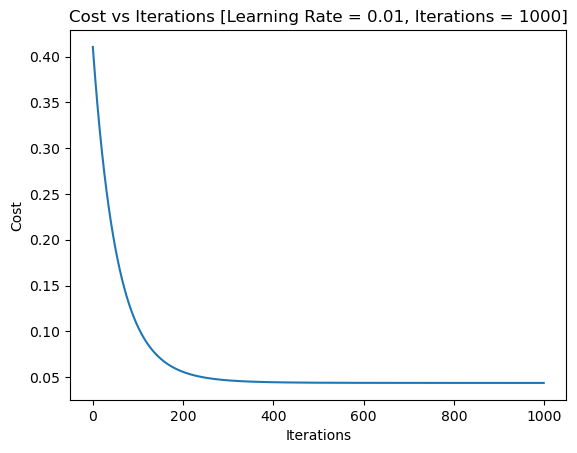

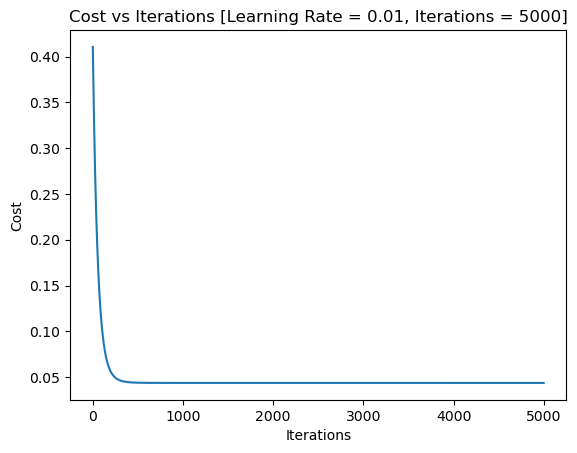

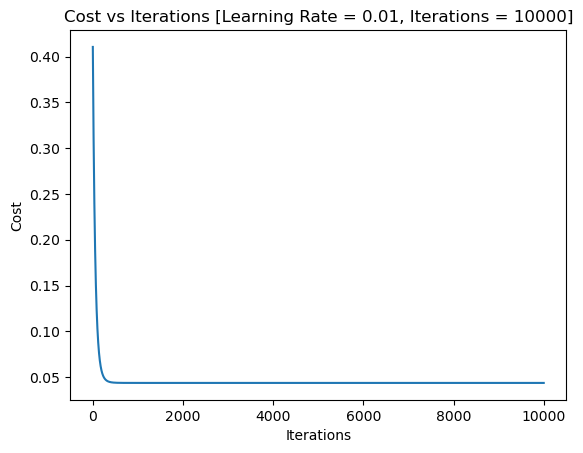

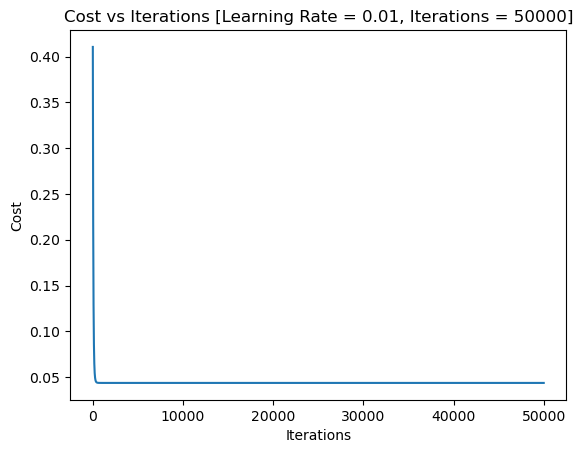

Iterations: 100, Train R2: 0.7444346754732712, Test MSE: 0.24679613666795946, Final Cost: 0.10594600980501667
Iterations: 500, Train R2: 0.893118262386777, Test MSE: 0.1032143150568267, Final Cost: 0.04386872066144781
Iterations: 1000, Train R2: 0.8936762323792866, Test MSE: 0.10267549063382253, Final Cost: 0.043637096396902386
Iterations: 5000, Train R2: 0.8936793584593188, Test MSE: 0.10267247181866716, Final Cost: 0.04363580052293353
Iterations: 10000, Train R2: 0.8936793584593188, Test MSE: 0.10267247181866716, Final Cost: 0.043635800522933546
Iterations: 50000, Train R2: 0.8936793584593188, Test MSE: 0.10267247181866716, Final Cost: 0.043635800522933546


In [255]:
# Learning rate = 0.01
iterations_list = [100, 500, 1000, 5000, 10000, 50000]

# Dictionary to store the results
results = {}

# Loop through the different iteration counts
for iterations in iterations_list:
    theta, costs = gradient_descent(
        x_train, y_train, initialize_weights(), learning_rate, iterations
    )

    y_train_pred = predict(x_train, theta)

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)

    # Store the results
    results[iterations] = {
        "theta": theta,
        "costs": costs,
        "train_r2": train_r2,
        "train_mse": train_mse,
    }

    plot_cost(costs, f"[Learning Rate = 0.01, Iterations = {iterations}]")

# Print Iterations and Corresponding Test MSE
for iterations, result in results.items():
    print(
        f"Iterations: {iterations}, Train R2: {result['train_r2']}, Test MSE: {result['train_mse']}, Final Cost: {result['costs'][-1]}"
    )

- As observed from above the result of the iterations above, while the number of iterations increases, the value of $R^2$ also increases, while both MSE and the final cost decreases. At 500th iteration, we can see that the values does not change significantly, and while the number of iterations became higher approaching to 1000, $R^2$, MSE, and the final cost becomes constant. It infers that a very large number of iterations in this dataset is not necessarily needed to produce a more accurate result.

4. Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate. The common learning rates in machine learning include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE PLOT. Provide your analysis.

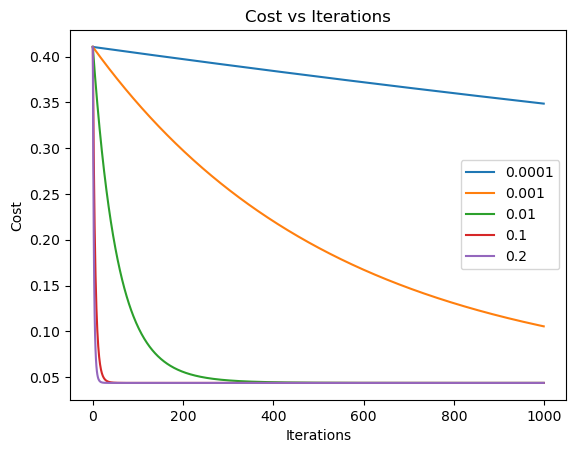

In [256]:
optimal_iteration = 1000
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.2]

costs_arr = []
for learning_rate in learning_rates:
    theta, costs = gradient_descent(
        x_train, y_train, initialize_weights(), learning_rate, optimal_iteration
    )
    plt.plot(costs, label=learning_rate)

    costs_arr.append(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.legend()
plt.show()

- It can be said that those which have a lower alpha (learning rate) will yield higher iterations which means that the lower the alpha, the longer it takes to converge. With that said, higher alpha means that it will converge must faster and the costs became more stabilized. In this case, having 0.1 to 0.2 of learning rate can be considered as the optimal learning rate for this dataset.

5. Is there a relationship on the learning rate and the number of iterations?

- There is a clear relationship between learning rate and the number of iterations. It can be constantly seen from the graph above that a lower learning rate yields a higher number of iterations. Meanwhile, a high learning rate only needs a small amount of iterations (close to 0; [0.2]). However, a much higher learning rate than 0.2 may cause divergence in this dataset.

6. Compare the results with the results of ordinary least squares function.

In [257]:
ols = LinearRegression()
ols.fit(x_train, y_train)

# Training and Testing
ols_train_pred = ols.predict(x_train)
ols_test_pred = ols.predict(x_test)

# R^2 scores for training and testing
ols_train_r2 = r2_score(y_train, ols_train_pred)
ols_test_r2 = r2_score(y_test, ols_test_pred)

# MSE scores for training and testing
ols_train_mse = mean_squared_error(y_train, ols_train_pred)
ols_test_mse = mean_squared_error(y_test, ols_test_pred)

# OLS weights without the bias
ols_weights = ols.coef_[1:]

In [258]:
print("OLS Results:")
print(f"Training R^2: {ols_train_r2}")
print(f"Test R^2: {ols_test_r2}")
print(f"Training MSE: {ols_train_mse}")
print(f"Test MSE: {ols_test_mse}")
print(f"OLS Weights: {ols_weights}\n")

print("Gradient Descent Results:")
print(f"Training R^2: {train_r2}")
print(f"Test R^2: {test_r2}")
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Gradient Descent Weights: {weights[1:]}")

OLS Results:
Training R^2: 0.8936793584593188
Test R^2: 0.9110275702091715
Training MSE: 0.10267247181866714
Test MSE: 0.1053725243118759
OLS Weights: [0.73738315 0.53630718 0.00314254]

Gradient Descent Results:
Training R^2: 0.8936793584593188
Test R^2: 0.9074936404093632
Training MSE: 0.10267247181866716
Test MSE: 0.10955785570748026
Gradient Descent Weights: [0.72767341 0.5180252  0.02363435]


- OLS's and Gradient Descent's training $R^2$ is the same, together with MSE. Overall, the former produce a slightly better result than the latter. 